## Activation Functions


In [8]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from IPython.display import Image

In this chapter, we will tackle a few of the activation functions and discuss their roles. We use different activation functions for different cases, and understanding how they work can help you properly pick which of them is best for your task. 


The activation function is applied to the output of a neuron (or layer of neurons), which modifies outputs. We use activation functions because if the activation function itself is nonlinear, it allows for neural networks with usually two or more hidden layers to map nonlinear functions. We’ll be showing how this works in this chapter.



### In general, your neural network will have two types of activation functions. The first will be the activation function used in hidden layers, and the second will be used in the output layer.

### The Step Activation Function

 In a single neuron, if the weights · inputs + bias results in a value greater than 0, the neuron will fire and output a 1; otherwise, it will output a 0.


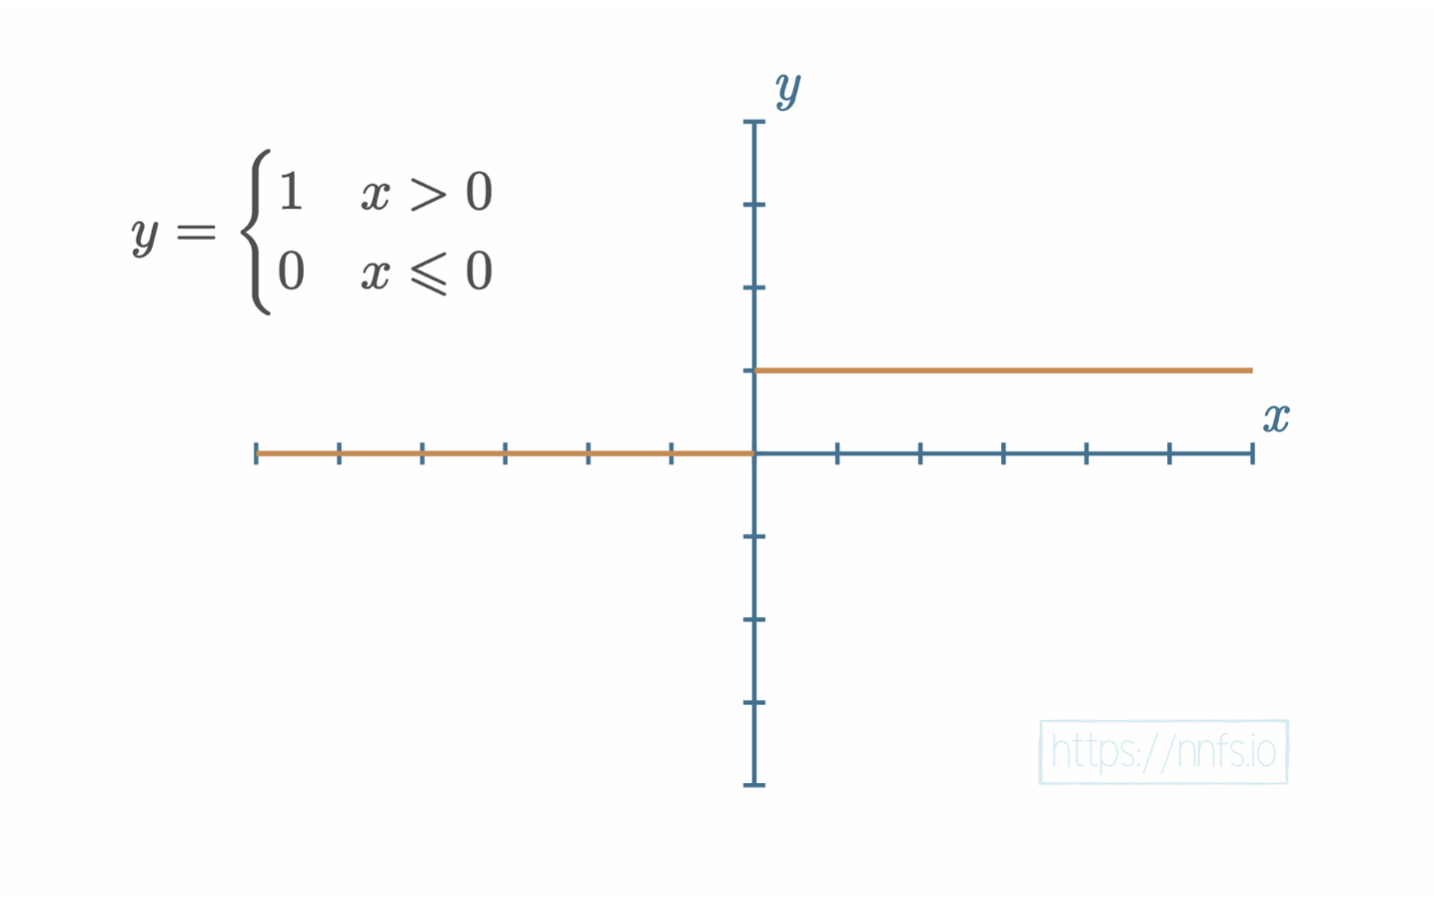

In [13]:
Image("Images/ActF.png", width = "500")

### The Linear Activation Function

A linear function is simply the equation of a line. It will appear as a straight line when graphed, where y=x and the output value equals the input.

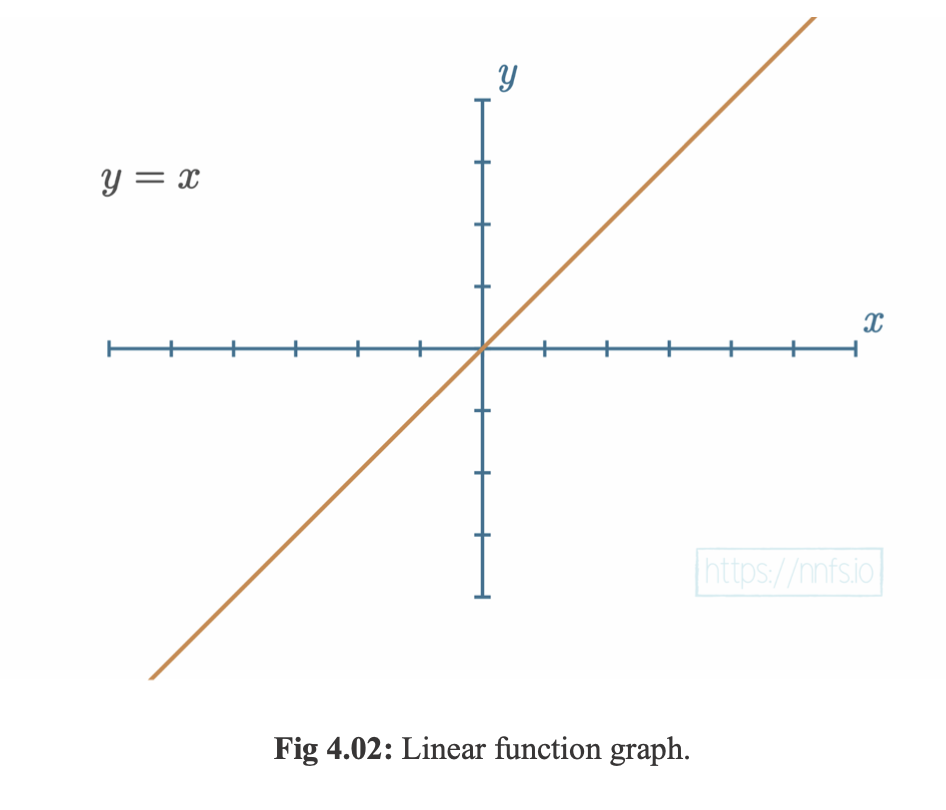

In [14]:
Image("Images/sc.png", width = "500")

### The Sigmoid Activation Function


The problem with the step function is it’s not very informative. When we get to training and network optimizers, you will see that the way an optimizer works is by assessing individual impacts that weights and biases have on a network’s output. 

The problem with a step function is that it’s less clear to the optimizer what these impacts are because there’s very little information gathered from this function. It’s either on (1) or off (0). It’s hard to tell how “close” this step function was to activating or deactivating. 

Maybe it was very close, or maybe it was very far. In terms of the final output value from the network, it doesn’t matter if it was close to outputting something else. Thus, when it comes time to optimize weights and biases, it’s easier for the optimizer if we have activation functions that are more granular and informative.

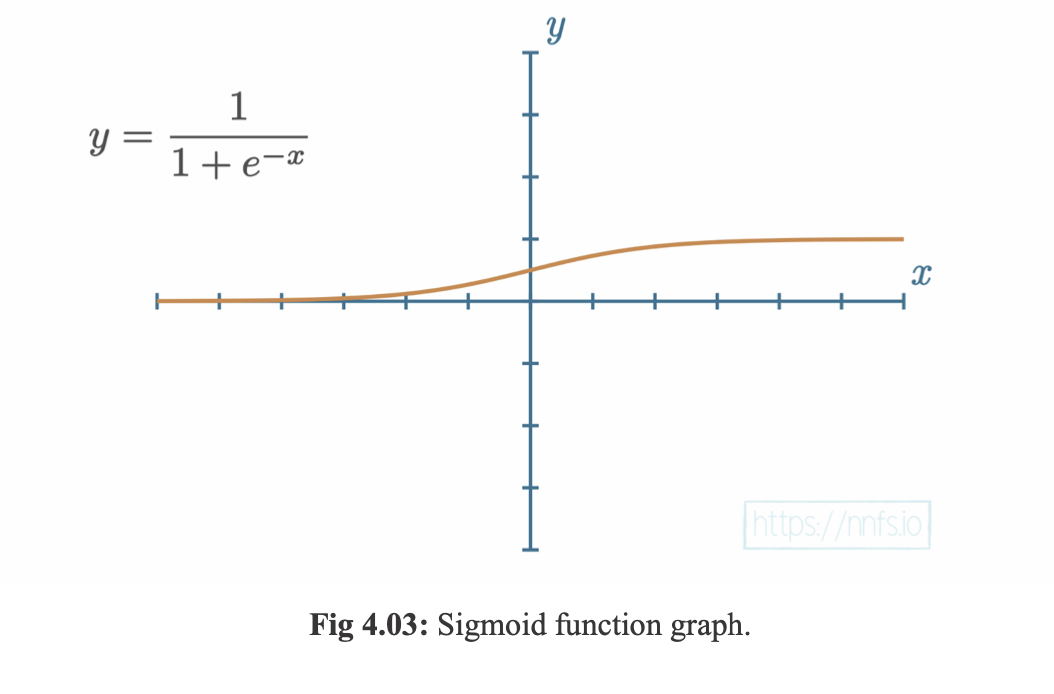

In [15]:
Image("Images/Sigmoid.png", width = "500")


As mentioned earlier, with “dead neurons,” it’s usually better to have a more granular approach for the hidden neuron activation functions. In this case, we’re getting a value that can be reversed to its original value; the returned value contains all the information from the input, contrary to
a function like the step function, where an input of 3 will output the same value as an input of 300,000. The output from the Sigmoid function, being in the range of 0 to 1, also works better with neural networks — **especially compared to the range of the negative to the positive infinity — and adds nonlinearity**

### Relu Activation Function 

he rectified linear activation function is simpler than the sigmoid. It’s quite literally y=x, clipped
at 0 from the negative side. If x is less than or equal to 0, then y is 0 — otherwise, y is equal to x.


This simple yet powerful activation function is the most widely used activation function at the time of writing for various reasons — mainly speed and efficiency. While the sigmoid activation function isn’t the most complicated, it’s still much more challenging to compute than the ReLU activation function. The ReLU activation function is extremely close to being a linear activation function while remaining nonlinear, due to that bend after 0. This simple property is, however, very effective.

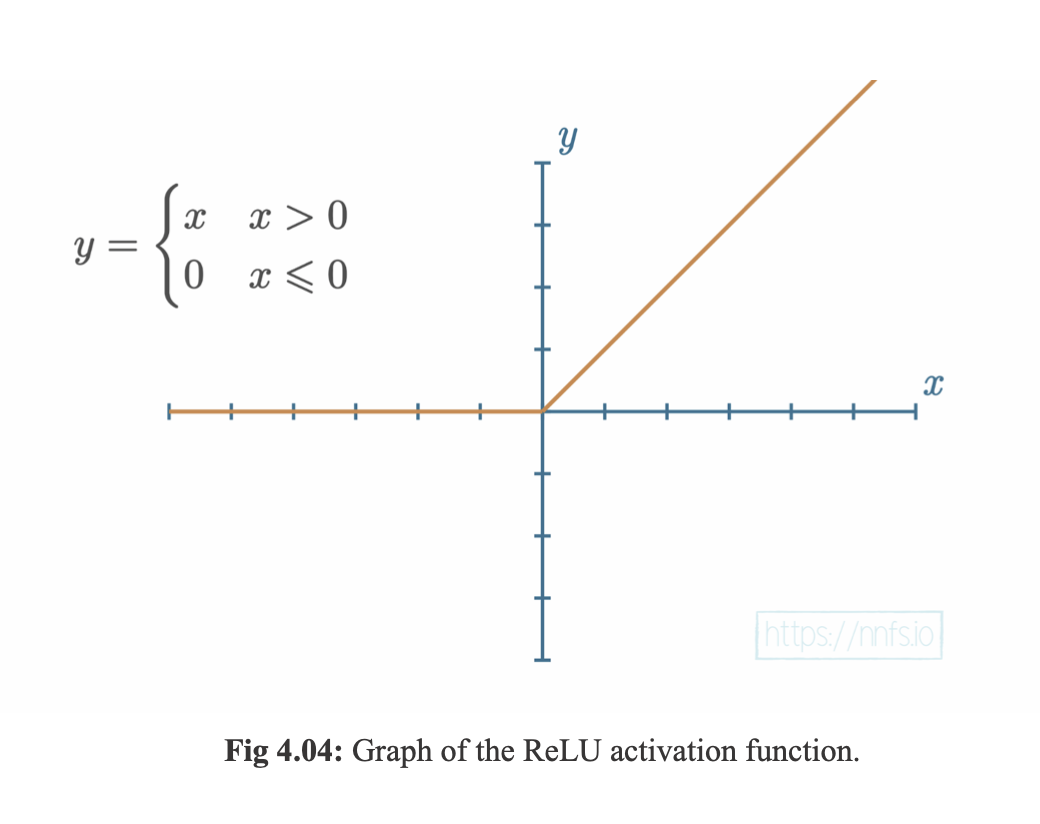

In [16]:
Image("Images/Relu.png", width = "500")

While there are certainly problems in life that are linear in nature, for example, trying to figure out the cost of some number of shirts, and we know the cost of an individual shirt, and that there are no bulk discounts, then the equation to calculate the price of any number of those products is
a linear equation. 

Other problems in life are not so simple, like the price of a home. The number of factors that come into play, such as size, location, time of year attempting to sell, number of rooms, yard, neighborhood, and so on, makes the pricing of a home a nonlinear equation. Many of the more interesting and hard problems of our time are nonlinear. The main attraction for neural networks has to do with their ability to solve nonlinear problems. 

The finance world has mostly non-linear problems that has to deal with and this is where activation functions shine the most.

## Visual link to how neurons are being fitted in non-linear data

https://nnfs.io/mvp/

In [21]:
#### RELU Act function code

inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]

#instant collection output
output = []

for i in inputs:
    if i >0:
        output.append(i)
    else:
        output.append(0)
        
print(output)        

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


The ReLU in this code is a loop where we’re checking if the current value is greater than 0. If it is, we’re appending it to the output list, and if it’s not, we’re appending 0. This can be written more simply, as we just need to take the largest of two values: 0 or neuron value. For example:

In [22]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]


output = []

for i in inputs:
    output.append(max(0,i))
    
    
print(output)    

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [26]:
import numpy as np
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]



output = np.maximum(0, inputs)
'''here we checking if the value is bigger 
than 0 we append it if not were appending to 0'''
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [33]:
import nnfs

from nnfs.datasets import spiral_data

In [42]:
import numpy as np
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]



output = np.maximum(0, inputs)
'''here we checking if the value is bigger 
than 0 we append it if not were appending to 0'''
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [43]:
## ReLu activation


class Activation_ReLU:
    #forward pass
    def forward(self, inputs):
        #calc output values from input 
        self.output = np.maximum(0,inputs)
        
#Let's apply this to the dense layer outputs in our code


#Create df

X, y = spiral_data(samples= 100, classes=3)

#create dense layer with  2 inputs features and 3 output values

dense1 = Layer_Dense(2,3)

#ReLU Activation

activation1 = Activation_ReLU()

# Make a forward pass of our training data through this layer

dense1.forward(X)



# Forward pass through activation func.
# Takes in output from previous layer
activation1.forward(dense1.output)



print(activation1.output[:5])



[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.78081822e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.79629685e-05 2.77967089e-04]
 [3.15305106e-04 0.00000000e+00 0.00000000e+00]
 [3.07787025e-04 0.00000000e+00 0.00000000e+00]]


As you can see, negative values have been clipped (modified to be zero). That’s all there is to the rectified linear activation function used in the hidden layer. Let’s talk about the activation function that we are going to use on the output of the last layer.

### The Softmax Activation Function

In the case of classification, what we want to see is a prediction of which class the network “thinks” the input represents. This distribution returned by the softmax activation function represents confidence scores for each class and will add up to 1. The predicted class is associated with the output neuron that returned the largest confidence score. Still, we can also note the other confidence scores in our overarching algorithm/program that uses this network. 

For example, if our network has a confidence distribution for two classes: [045, 055], the prediction is the 2nd class, but the confidence in
this prediction isn’t very high. Maybe our program would not act in this case since it’s not very confident.



<img src="Images/Softmax.png"style ="width: 200px;"/>



That might look daunting, but we can break it down into simple pieces and express it in Python code, which you may find is more approachable than the formula above. To start, here are example outputs from a neural network layer:


In [ ]:
layer_outputs = [4.8, 1.21, 2.385]
    

The first step for us is to “exponentiate” the outputs. We do this with Euler’s number, e, which is roughly 271828182846 and referred to as the “exponential growth” number. Exponentiating is taking this constant to the power of the given parameter:

$$y = e^x$$


Both the numerator and the denominator of the Softmax function contain e raised to the power of z, where z, given indices, means a singular output value — the index i means the current sample and the index j means the current output in this sample. The numerator exponentiates the current output value and the denominator takes a sum of all of the exponentiated outputs for a given sample. We need then to calculate these exponentiates to continue:


In [50]:
# Values from the previous output when we described
# what a neural network is
layer_outputs = [4.8, 1.21, 2.385]

# e - mathematical constant, we use E here to match a common coding
# style where constants are uppercased
E = 2.71828182846  # you can also use math.e

In [51]:
#For each value in a vector, calc the exponential value

exp_values = []
for output in layer_outputs:
    exp_values.append(E**output)
print("exponentiated values:")
print(exp_values)

exponentiated values:
[121.51041751893969, 3.3534846525504487, 10.85906266492961]


Exponentiation serves multiple purposes. To calculate the probabilities, we need non-negative values. Imagine the output as [4.8, 1.21, -2.385] — even after normalization, the last value will still be negative since we’ll just divide all of them by their sum. A negative probability (or confidence) does not make much sense. An exponential value of any number is always non- negative — it returns 0 for negative infinity, 1 for the input of 0, and increases for positive values:

The exponential function is a monotonic function. This means that, with higher input values, outputs are also higher, so we won’t change the predicted class after applying it while making sure that we get non-negative values. It also adds stability to the result as the normalized exponentiation is more about the difference between numbers than their magnitudes. Once we’ve exponentiated, we want to convert these numbers to a probability distribution (converting the values into the vector of confidences, one for each class, which add up to 1 for everything in the vector). What that means is that we’re about to perform a normalization where we take a given value and divide it by the sum of all of the values. For our outputs, exponentiated at this stage, that’s what the equation of the Softmax function describes next — to take a given exponentiated value and divide it by the sum of all of the exponentiated values. Since each output value normalizes to a fraction of the sum, all of the values are now in the range of 0 to 1 and add up to 1 — they share the probability of 1 between themselves. Let’s add the sum and normalization to the code:

 

In [54]:
#Now normalize values
norm_base = sum(exp_values)
norm_values = []

for value in exp_values:
    #dividing the summed exp values to to a fraction of the sum
    
    norm_values.append(value / norm_base)
    
print("Normalised exponentiated values:")

print(norm_values)
print("Sum of normalised values:", sum(norm_values))

Normalised exponentiated values:
[0.8952826639573506, 0.024708306782070668, 0.08000902926057876]
Sum of normalised values: 1.0


### We can achieve the same thing using NUMPY


In [55]:
import numpy as np

# Values from the previous output when we described
# what a neural network is
layer_outputs = [4.8, 1.21, 2.385]

#for every value in the layer_outputs calc the exp value
exp_values = np.exp(layer_outputs)

print('exponentiated values:')
print(exp_values)


#Now normalise values

norm_values = exp_values / np.sum(exp_values)

print('normalized exponentiated values:')
print(norm_values)
print('sum of normalized values:', np.sum(norm_values))

exponentiated values:
[121.51041752   3.35348465  10.85906266]
normalized exponentiated values:
[0.89528266 0.02470831 0.08000903]
sum of normalized values: 0.9999999999999999


**There are two main pervasive challenges with neural networks: “dead neurons” and very large numbers (referred to as “exploding” values). “Dead” neurons and enormous numbers can wreak havoc down the line and render a network useless over time. The exponential function used in softmax activation is one of the sources of exploding values. Let’s see some examples of how and why this can easily happen:**

In [56]:
print(np.exp(10))
print(np.exp(100))
print(np.exp(1000))


22026.465794806718
2.6881171418161356e+43
inf


<ipython-input-56-2a14d587d35d>:3: RuntimeWarning: overflow encountered in exp
  print(np.exp(1000))



It doesn’t take a very large number, in this case, a mere 1,000, to cause an overflow error. We know the exponential function tends toward 0 as its input value approaches negative infinity, and the output is 1 when the input is 0 (as shown in the chart earlier):


**With Softmax, thanks to the normalization, we can subtract any value from all of the inputs, and it will not change the output:**

In [59]:
#Softmax activation

class Activation_Softmax:
    #forward pass
    def forward(self,inputs):
        #get unnormalised probab
        exp_values = np.exp(inputs - np.max(inputs,
                                           axis=1,
                                    keepdims=True))
        #normalise them for each sample
        probabilities = exp_values / np.sum(exp_values, axis = 1, 
                                           keepdims=True)
        
        self.output = probabilities

In [61]:
softmax = Activation_Softmax()

softmax.forward([[1,2,3]])

print(softmax.output)


[[0.09003057 0.24472847 0.66524096]]


In [62]:
softmax.forward([[-2, -1, 0]])  # subtracted 3 - max from the list

print(softmax.output)


[[0.09003057 0.24472847 0.66524096]]
